<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-10' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_IDName = "20201214 Ray Beechinor" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
Student_IDName = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# INTRODUCTION




The goal of this E-tivity is to use various linear regression methods to build a model which predicts house prices, given a set of historical house price data, which includes a mixture of numerical, categorical, and textual data.

In this E-tivity, we will use Natural Language Processing (NLP) to extract features from the textual data provided.

Once the NLP-derived features are created, the original text features are discarded.  'XGBoost' is then used to identify the 10 features which contribute most strongly to the price.

Three linear models are then trained and compared:
- A Bayesian Linear Regression Model
- A Piecewise-Linear Regression Model, in which a separate Bayesian Linear Regression model is built for each piece, and all pieces are then reassembled
- A Bayesian Neural Network



***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [9]:
!pip install gpy

     |████████████████████████████████| 959 kB 5.4 MB/s 
     |████████████████████████████████| 71 kB 7.6 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565094 sha256=c51d65fc5379ae101f1852553059eadb685dd24ad877a37c9d239788e7b13717
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=87f0ada568ad47e1860086640835e18024f2e0d9a3267cb6b425025f0aab0c1d
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [10]:
# https://medium.com/@lukei_3514/dealing-with-contractions-in-nlp-d6174300876b
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
!pip install contractions

     |████████████████████████████████| 284 kB 4.7 MB/s 
     |████████████████████████████████| 321 kB 37.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85441 sha256=44722f6bbd55eaf433ae1b9dd9f06d77b84970034debbef625a0fa6300c7a6ac
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [11]:
import contractions

In [12]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [13]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The challenge is to predict the final price of each house.

## Training & Test Data

In [15]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

### Train dataset

In [16]:
# training dataset: 
# /content/drive/MyDrive/HousePrices/HousePrice_Test.csv
syntPath = "/content/drive/MyDrive/HousePrices/"
filename1 = "HousePrice_Train.csv"
filename2 = "HousePrice_Test.csv"
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
#cost_file = syntPath+filename3


In [17]:
dftrain = pd.read_csv(training_file)
dftest  = pd.read_csv(testing_file)

# **Initial Design Exploration**
### Start by looking at the head of the Training Data Frame

In [18]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


### Report statistics: this gives an initial indication of outliers, missing data, etc.

In [19]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


### Test dataset

In [20]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [21]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


### Coarse information about data types and number of entries in each column


In [22]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [23]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          702 non-null    int64  
 1   ID             702 non-null    int64  
 2   Location       702 non-null    object 
 3   Num_Bathrooms  702 non-null    int64  
 4   Num_Beds       702 non-null    int64  
 5   BER_class      594 non-null    object 
 6   Description    702 non-null    object 
 7   Services       246 non-null    object 
 8   Features       702 non-null    object 
 9   Latitude       702 non-null    float64
 10  Longitude      702 non-null    float64
 11  Type           702 non-null    object 
 12  Surface        702 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 71.4+ KB


### Expected Cost dataset

In [24]:
# Generate descriptive statistics
#dfcost.describe()

In [25]:
# 1. 'Services' is mostly (>50%) empty -> drop
# 2.  'ID' conveys no useful information for learning -> drop
dftrain.drop(['ID', 'Services'], axis=1, inplace=True)
dftest.drop(['ID', 'Services'], axis=1, inplace=True)

In [26]:
# 4. Drop  'Location'....Latitude and Longitude convey the same information
dftrain.drop(['Location'], axis=1, inplace=True)
dftest.drop(['Location'], axis=1, inplace=True)

Check for duplicate entries

In [27]:
# Check for duplicate entries
dftrain[dftrain.duplicated(subset = ['Latitude','Longitude','Surface','Price'], keep = False)].sort_values(by = ['Price'])

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
473,474,2,2,C1,No. 152 is a delightful 2-bedroom mid terrace ...,- Spacious 2 bed mid terrace house presented i...,53.609212,-6.203485,terraced,75.00,210000
475,476,2,2,C1,No. 152 is a delightful 2-bedroom mid terrace ...,Spacious 2 bed mid terrace house presented in ...,53.609212,-6.203485,terraced,75.00,210000
469,470,1,3,D2,€¢ Excellent 3 bed semi-detached house within ...,Fully PP for attached Annex (granny flat) to t...,53.606496,-6.189673,semi-detached,82.00,265000
516,517,1,3,D2,This beautiful 3 bed property presents itself ...,-Excellent 3 bed semi-detached house within ma...,53.606496,-6.189673,semi-detached,82.00,265000
12,13,3,3,D1,This impressive family home ticks all the boxe...,Quiet cul de sac location \nGas central heatin...,53.585895,-6.185049,semi-detached,104.50,285000
844,845,3,3,D1,This impressive family home ticks all the boxe...,Quiet cul de sac location \nGas central heatin...,53.585895,-6.185049,semi-detached,104.50,285000
15,16,1,3,C2,An excellent opportunity to acquire this exten...,Presented in Show House Condition Throughout\n...,53.607108,-6.173910,semi-detached,112.00,325000
1502,1503,1,3,C2,An excellent opportunity to acquire this exten...,Presented in Show House Condition Throughout\n...,53.607108,-6.173910,semi-detached,112.00,325000
178,179,2,2,C3,"Apt. 38, Seamount Apartments, Booterstown, Co....",None,53.307339,-6.203063,apartment,73.00,395000
683,684,2,2,C3,"Apt. 38, Seamount Apartments, Booterstown, Co....",None,53.307339,-6.203063,apartment,73.00,395000


In [28]:
dftest[dftest.duplicated(subset = ['Latitude','Longitude','Surface'], keep = False)].sort_values(by = ['Surface'])

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface
114,1753,1,3,NaN,HJ Byrne &amp; O'Dwyer English Auctioneers hav...,€¢\tRefurbished 3 bed mid terrace residence wi...,53.380547,-6.274572,terraced,84.0
647,2286,1,3,NaN,HJ Byrne &amp; Dwyer English Auctioneers have ...,€¢\tRefurbished 3 bed mid terrace residence wi...,53.380547,-6.274572,terraced,84.0


In [29]:
dftrain = dftrain.drop_duplicates(subset=['Latitude','Longitude','Surface','Price'])


###Number of missing entries in features

In [30]:
dftrain.isna().sum()

Index              0
Num_Bathrooms      0
Num_Beds           0
BER_class        251
Description        0
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Price              0
dtype: int64

In [31]:
# Identify categorical and numerical data - see (‘python - Check which columns in DataFrame are Categorical’ 2021)
def getCategoricalAndNumericalFeatures(df):
    """Given a Pandas dataframe, 'df', print the list of columns in that dataframe containing categorical data.
    Returns a dictionary with two keys:
    key 'categorical': returns a list of categorical features
    key 'numerical' : returns a list of numerical features
    """
    dReturnDict = {}
    cols = df.columns
    numCols = df._get_numeric_data().columns
    # Return a list of the columns containing categorical data
    # this assumes that every column which is not numeric is categorical
    # OK for this dataset, but may not generally hold.
    lCategorical = list(set(cols) - set(numCols))
    lOriginalNumerical = list(set(numCols))
    sCategories = ",".join(lCategorical)
    print("Categorical data in this dataset are: {}".format(sCategories))
    dReturnDict['categorical'] = lCategorical
    dReturnDict['numerical'] = lOriginalNumerical
    return dReturnDict

### Categorical Data

In [32]:
# Again, useful for this task to summarise the categorical data:
# Create a data frame of the categorical data, generate some stats using 'describe'
dFeatureDict = getCategoricalAndNumericalFeatures(dftrain)

dfCategorical = dftrain[dFeatureDict['categorical']]
dfCategorical.describe()

Categorical data in this dataset are: Features,Type,BER_class,Description


,Features,Type,BER_class,Description
count,1631,1631,1380,1631
unique,1113,10,16,1631
top,None,semi-detached,D1,"An excellent opportunity to acquire a mature, ..."
freq,515,454,180,1


In [33]:
def plotHistogramAndBoxPlot(df, sColumnName):
    """Given the name of a column in the datafraome, plot a histogram and boxplot of the data in that column, side by side"""
    fig = plt.figure(figsize=(16,4))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Histogram of {}".format(sColumnName))
    ax1.set_xlabel(sColumnName)
    ax1.set_ylabel('Number of Properties')
    df[sColumnName].hist(bins=20)

    ax3 = fig.add_subplot(1, 2, 2)
    ax3.set_title("BoxPlot of {}".format(sColumnName))
    ax3.set_xlabel(sColumnName)
    ax3.set_ylabel("Values of {}".format(sColumnName))
    df.boxplot(column=[sColumnName])

    plt.show()

In [34]:
# Print information about categorical features
dCategoricalAndNumericalFeatures = getCategoricalAndNumericalFeatures(dftrain)
lCategoricalFeatures = dCategoricalAndNumericalFeatures['categorical']
for sCategoricalFeature in lCategoricalFeatures:
  print("Feature: '{}'".format(sCategoricalFeature))
  print("\t{}".format(dftrain[sCategoricalFeature].value_counts()))
  print("\n")

Categorical data in this dataset are: Features,Type,BER_class,Description
Feature: 'Features'
	None                                                                                                                                                                                                                                                                                                                                                                                                                            515
Modern fitted kitchen\nAll amenities on your doorstep\n                                                                                                                                                                                                                                                                                                                                                                           3
Heated by highly efficient Air Source Heat Pump\nElegant reconsti

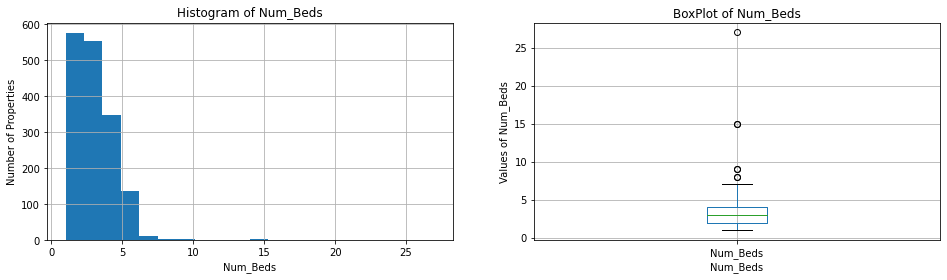

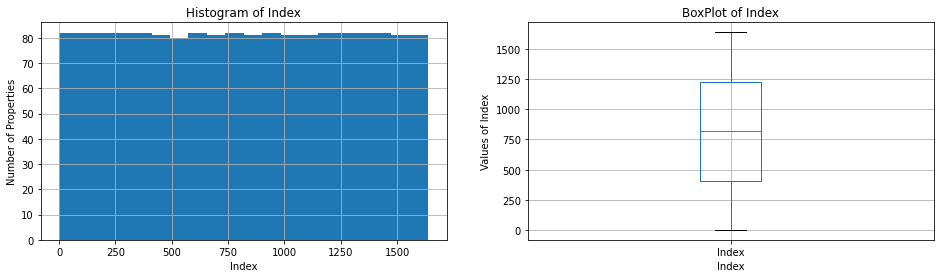

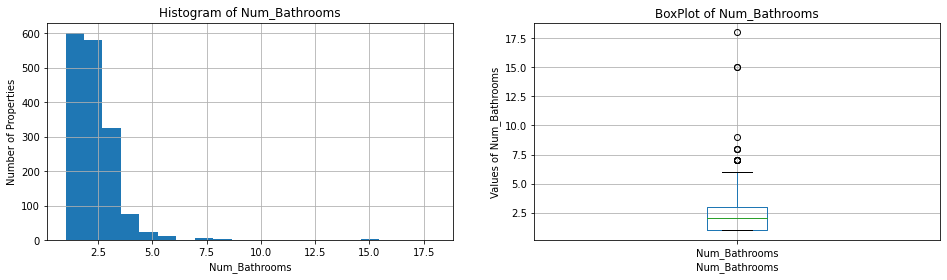

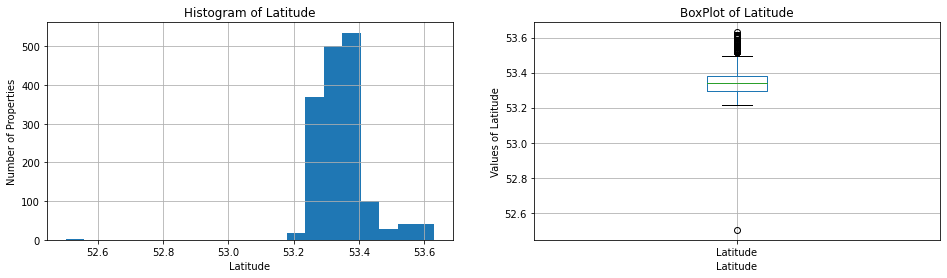

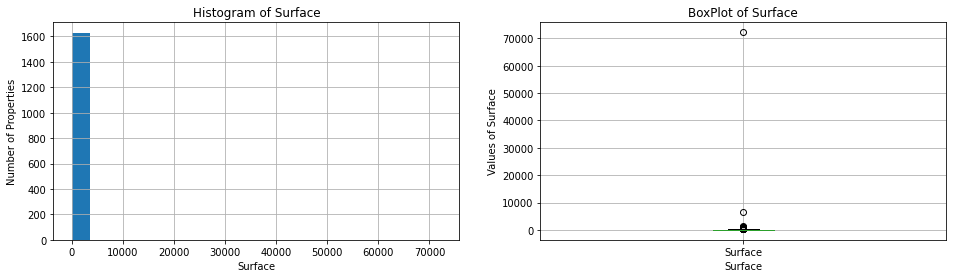

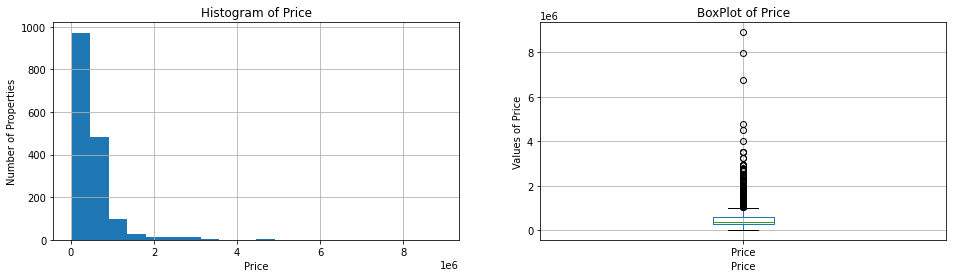

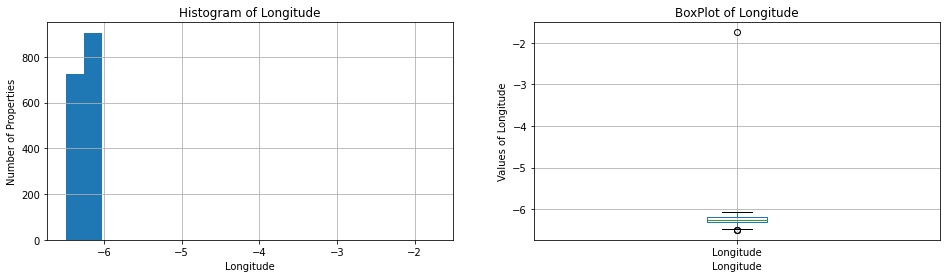

In [35]:
for sNumericalFeature in dCategoricalAndNumericalFeatures['numerical']:
  plotHistogramAndBoxPlot(dftrain,sNumericalFeature)

In [36]:
def findOutliers(df):
  """Given a Pandas dataframe, 'df', print an an analyis which shows the number of outliers in each column
     This will print the number of outliers above the inter-quartile range and the number of outliers below the inter-quartile range"""

# Find outliers.
# 1.  Calculate interquartile range

  dfQ1 = df.quantile(0.25)
  dfQ3 = df.quantile(0.75)
  dfIQR = dfQ3 - dfQ1
# Anything which is more than 1.5 times the inter-quartile range below the first quartile or
# above the third quartile is an outlier
  dfLowerOutlier = (dfQ1 - (1.5 * dfIQR))
  dfUpperOutlier = (dfQ3 + (1.5 * dfIQR))
  bIsOutlier = ((df < (dfQ1  - (1.5 * dfIQR))) | (df > (dfQ3 + (1.5 * dfIQR))))

  print("# Outliers in dataset")
  print(((df < (dfQ1 - 1.5 * dfIQR)) | (df > (dfQ3 + 1.5 * dfIQR))).sum())
  print("\n")
  print("# Outliers above the third quartile of the distribution")
  print((df > (dfQ3 + 1.5 * dfIQR)).sum())
  print("\n")
  print("# Outliers below the first quartile of the distribution")
  print((df < (dfQ1 - 1.5 * dfIQR)).sum())

In [37]:
findOutliers(dftrain)

# Outliers in dataset
BER_class          0
Description        0
Features           0
Index              0
Latitude          83
Longitude          4
Num_Bathrooms     13
Num_Beds           7
Price            140
Surface          122
Type               0
dtype: int64


# Outliers above the third quartile of the distribution
BER_class          0
Description        0
Features           0
Index              0
Latitude          82
Longitude          1
Num_Bathrooms     13
Num_Beds           7
Price            140
Surface          122
Type               0
dtype: int64


# Outliers below the first quartile of the distribution
BER_class        0
Description      0
Features         0
Index            0
Latitude         1
Longitude        3
Num_Bathrooms    0
Num_Beds         0
Price            0
Surface          0
Type             0
dtype: int64


Drop locations outside of Dublin (assumed Dublin is -6W and 53N)

In [38]:
# Drop locations which are outside Dublin...from plots:  longitude > -6 W; latitude < 53N
dftrain[dftrain.Longitude > -6]

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,356,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


In [39]:
dftrain[dftrain.Latitude < 53]

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,356,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


In [40]:
dfIndexBadLongitude = dftrain[dftrain['Longitude'] > -6].index
dftrain.drop(dfIndexBadLongitude, inplace=True)

Drop example whose surface area makes it an egregious outlier

In [41]:
# There appears to be one example with a very large surface area
dftrain[dftrain.Surface > 10000]

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
506,507,1,4,E1,Thornton Park is a superb modern equestrian ce...,None,53.474502,-6.343483,bungalow,72236.38714,1100000


In [42]:
# Drop this (Equestrian Centre would explain the surface area, perhaps)
dfIndexSurfaceOutlier = dftrain[dftrain['Surface'] > 10000].index
dftrain.drop(dfIndexSurfaceOutlier, inplace=True)

Drop examples with more than 10 bedrooms and/or bathrooms

In [43]:
# There should be few examples with more than 10 bedrooms and/or 10 bathrooms

dftrain[(dftrain["Num_Bathrooms"] > 10) | (dftrain["Num_Beds"] > 10)]

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
557,558,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.2,775000
1099,1100,15,15,NaN,A truly unique stone built house of great qual...,Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.0,1500000
1378,1379,18,27,NaN,The Grove is an imposing Victorian mansion bui...,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.0,4500000


In [44]:
# Drop These
dfIndexBedsBathroomsOutliers = dftrain[(dftrain["Num_Bathrooms"] > 10) | (dftrain["Num_Beds"] > 10)].index
dftrain.drop(dfIndexBedsBathroomsOutliers, inplace=True)

One-hot-encode the 'Type' feature

In [45]:
# One-hot-encode the 'Type' feature
dftrain = pd.get_dummies(dftrain, columns=['Type'])
dftest = pd.get_dummies(dftest, columns=['Type'])

'BER_Class' is an ordinal type; convert to numeric by mapping

In [46]:
# Deal with 'BER_class'
dftest['BER_class'].value_counts()

D1                     72
C3                     70
D2                     68
C2                     65
C1                     49
E2                     47
F                      46
E1                     44
G                      41
B3                     28
B2                     21
A3                     20
A2                      8
SINo666of2006exempt     8
B1                      7
Name: BER_class, dtype: int64

In [47]:
dBERClassificationMap = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt" : 16
}
dftrain['BER_class'] = dftrain['BER_class'].replace(dBERClassificationMap)
dftest['BER_class'] = dftest['BER_class'].replace(dBERClassificationMap)

In [48]:
dftrain['BER_class'].mean()

9.901306240928882

In [49]:
dftest['BER_class'].mean()

9.872053872053872

....and then fill missing entries with the mean of the existing entires.

In [50]:
# Replace 'N/A' values in ber_classification with mean, which is approx 10, i.e D1
dftrain['BER_class'].fillna(10, inplace=True)
dftest['BER_class'].fillna(10, inplace=True)

Scale remaining numerical data - StandardScaler for Latitude, Longitude, and BER_Class; log-transform others

In [51]:
# Scale numerical data
oStandardScaler = StandardScaler()
dftrain[['Latitude', 'Longitude', 'BER_class']] = oStandardScaler.fit_transform(dftrain[['Latitude', 'Longitude', 'BER_class']])
dftest[['Latitude', 'Longitude', 'BER_class']] = oStandardScaler.fit_transform(dftest[['Latitude', 'Longitude', 'BER_class']])

In [52]:
# Log-transform 'beds', 'bathrooms', and 'surface'
dftrain['Num_Beds'] = np.log(dftrain['Num_Beds'])
dftest['Num_Beds'] = np.log(dftest['Num_Beds'])

dftrain['Num_Bathrooms'] = np.log(dftrain['Num_Bathrooms'])
dftest['Num_Bathrooms'] = np.log(dftest['Num_Bathrooms'])

dftrain['Surface'] = np.log(dftrain['Surface'])
dftest['Surface'] = np.log(dftest['Surface'])



# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

References: Following processes described in (data4help 2021a) and 
(data4help 2021b).  See also (Dios 2020) and (Maklin 2019)

In [53]:
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Build up a list of punctuation symbols and stopwords to be removed from the text.  The 'lEstateAgentSpeak' list was constructed from visual analysis of the text

In [54]:
import string
# 'string.punctuation does not include the Euro symbol by default -> add it
string.punctuation = string.punctuation + '€¢'
lStopwords = stopwords.words('english')
lStopwords.append('x')
lEstateAgentSpeak = ['bedroom', 'bathroom', 'kitchen', 'floor', 'heating', 'apartment', 'studio', 'terraced', 'townhouse', 'bungalow', 'duplex', 'end-of-terrace', 'home', 'family', 'entrance', 'hall', 'dining', 'room', 'sink', 'living', 'wash', 'hand', 'basin', 'double']
lEstateAgentSpeak.extend(['washing', 'machine', 'within', 'facing', 'extractor', 'fan', 'hob', 'access', 'delighted', 'present', 'splash', 'window', 'fired', 'door', 'hot', 'press', 'de', 'attachment', 'shower', 'bath', 'would'])
lStopwords.extend(lEstateAgentSpeak)
lStoplist = lStopwords + list(string.punctuation)
stoplist = set(lStoplist)

words = set(nltk.corpus.words.words())

Helper dictionary and proc to preprocess the text.  
Start by calling the 'contractions.fix' method to expand contracted words (like "can't" and "won't": removing the apostophe alone is not sufficient as 'cant' and 'wont' are both valid English words

By passing the 'translate_table' dict to the 'translate' method, we remove punctuation.  Then we convert any word which is in the 'words' corpus to lower-case and tokenise it.  Numbers are ignored.

In [55]:
# The 'translate_table' dictionary will be used to replace any character in the punctuation list with None, removing the character
translate_table = dict((ord(char), None) for char in string.punctuation)

def preprocess(sText, translate_table):
  """Preprocess text:  1.  Expand contractions (like "n't")
     2.  Remove punctuation
     3.  Tokenise any strings which are not in the stoplist and not digits
     4.  Convert to lower-case
     """
  sExpandedText = contractions.fix(sText)
  sNoPunctuationExpandedText=sExpandedText.translate(translate_table)
  return [sWord.lower() for sWord in word_tokenize(sNoPunctuationExpandedText) if sWord.lower() not in stoplist and sWord.lower() in words and sWord.isalpha()]

In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
dftrain['TokenisedDescription'] = dftrain['Description'].apply(preprocess,translate_table=translate_table)
dftrain['TokenisedFeatures'] = dftrain['Features'].apply(preprocess,translate_table=translate_table)

In [58]:
dftest['TokenisedDescription'] = dftest['Description'].apply(preprocess, translate_table=translate_table)
dftest['TokenisedFeatures'] = dftest['Features'].apply(preprocess, translate_table=translate_table)

In [59]:
dftrain.head()

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,1,0.693147,0.693147,-0.320278,DNG are delighted to present to the market no....,None,0.637691,-1.966484,4.204693,195000,1,0,0,0,0,0,0,0,0,0,"[market, chipping, row, two, comes, market, ex...",[none]
1,2,0.000000,0.693147,0.029233,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,0.093810,0.200678,4.564036,425000,0,0,0,0,0,0,0,0,1,0,"[terrace, charming, red, brick, period, set, s...","[bight, spacious, interior, numerous, original..."
2,3,1.098612,1.098612,-2.417345,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,-1.153567,0.385888,4.672829,535000,0,0,0,0,0,1,0,0,0,0,"[welcome, cotter, close, immaculately, three, ...","[special, large, rear, garden, generous, stree..."
3,4,0.000000,1.098612,0.728256,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,-1.220544,0.996066,4.394449,499000,0,0,1,0,0,0,0,0,0,0,"[welcome, sycamore, walk, enjoying, premier, a...","[wonderful, bed, detached, accommodation, enjo..."
4,5,1.098612,1.386294,0.029233,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,2.757522,1.489615,5.030438,510000,0,0,1,0,0,0,0,0,0,0,"[four, comes, market, wonderful, opportunity, ...","[detached, property, glazed, detached, master,..."


In [60]:
dftest.head()

,Index,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_terraced,Type_townhouse,TokenisedDescription,TokenisedFeatures
0,1639,0.693147,0.693147,-0.636769,OMD Estate Agents are delighted to present thi...,Designated parking spaces\nPresented in pristi...,-0.462409,0.098546,4.174387,0,0,0,0,0,0,0,0,1,"[estate, bed, situated, well, sought, location...","[parking, pristine, condition, glazing, throug..."
1,1640,0.693147,1.609438,0.709652,Welcome to Saint Anthony No.214 Glasnevin Aven...,Modern Worcester Gas Boiler\nSingle Glazed Win...,0.545594,-0.322551,4.955827,0,0,0,0,0,1,0,0,0,"[welcome, saint, avenue, substantial, residenc...","[modern, worcester, gas, boiler, single, glaze..."
2,1641,0.000000,0.693147,1.719468,"Located in this ever popular road, on grounds ...",2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,-1.054803,1.570297,4.382027,0,0,1,0,0,0,0,0,0,"[ever, popular, road, grounds, approximately, ...","[detached, house, acre, oil, central, street, ..."
3,1642,1.386294,1.386294,-2.656400,DNG are delighted to represent the sale of thi...,Detached House\nSouth Facing Garden\nOff Stree...,0.358376,0.732808,5.342334,0,0,1,0,0,0,0,0,0,"[represent, sale, impeccable, designed, four, ...","[detached, house, south, garden, street, parki..."
4,1643,0.693147,1.098612,1.382862,A unique opportunity to acquire this red brick...,Red brick end of terrace property \nC. 108sqm ...,-0.314398,-0.617542,4.682131,0,0,0,0,1,0,0,0,0,"[unique, opportunity, acquire, red, brick, pro...","[red, brick, end, terrace, property, c, west, ..."


Having tokenised the text, we now lemmatise it

In [61]:
from nltk.stem import WordNetLemmatizer

In [62]:
oLemmatizerObj = WordNetLemmatizer()

In [63]:
def lemmatise(lListOfTokens,lemmatizerObj):
  """Apply Lemmatizer to a list of tokens"""
  lReturn = [lemmatizerObj.lemmatize(sWord) for sWord in lListOfTokens]
  return lReturn


In [64]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Your comments, explanation, and references here.

In [65]:
dftrain['LemmatizedDescription'] = dftrain['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [66]:
dftest['LemmatizedDescription'] = dftest['TokenisedDescription'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

In [67]:
dftrain['LemmatizedFeatures'] = dftrain['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)
dftest['LemmatizedFeatures'] = dftest['TokenisedFeatures'].apply(lemmatise, lemmatizerObj=oLemmatizerObj)

This leaves a few cases where the lemmatiser returns 'none'.  Remove these

In [68]:
# Filter the word 'none'
dftrain['LemmatizedFeatures'] = dftrain.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])
dftest['LemmatizedFeatures'] = dftest.LemmatizedFeatures.apply(lambda x: [i for i in x if i != 'none'])

The next step is to convert the words in the 'LemmatizedFeatures' and 'LemmatizedDescription' columns to a list so that we can extract n-grams

In [69]:
# Convert descriptions in training data to a list
lTrainingDescriptions = dftrain['LemmatizedDescription'].tolist()
# This will be a list of lists.  Merge into a single list to analyse bigrams and trigrams

lMergedTrainingDescriptions = []
for lDescription in lTrainingDescriptions:
  lMergedTrainingDescriptions.extend(lDescription)

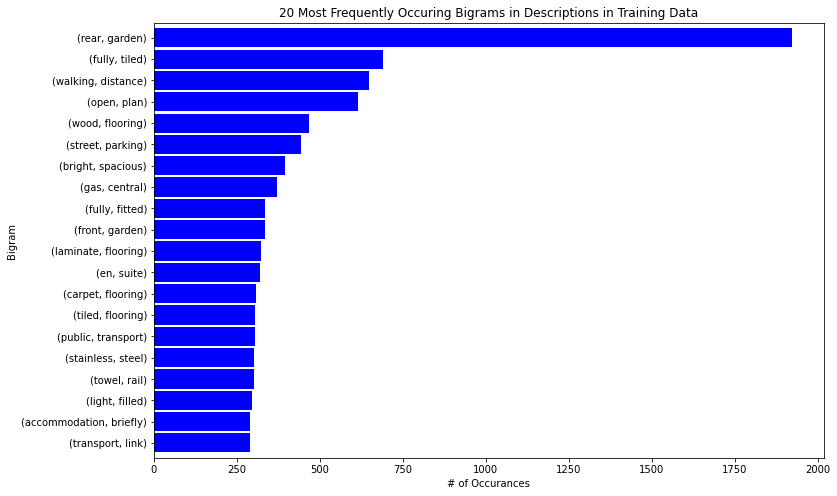

In [70]:
from nltk.util import ngrams
bigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(lMergedTrainingDescriptions, 3)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Descriptions in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

Text(0.5, 0, '# of Occurances')

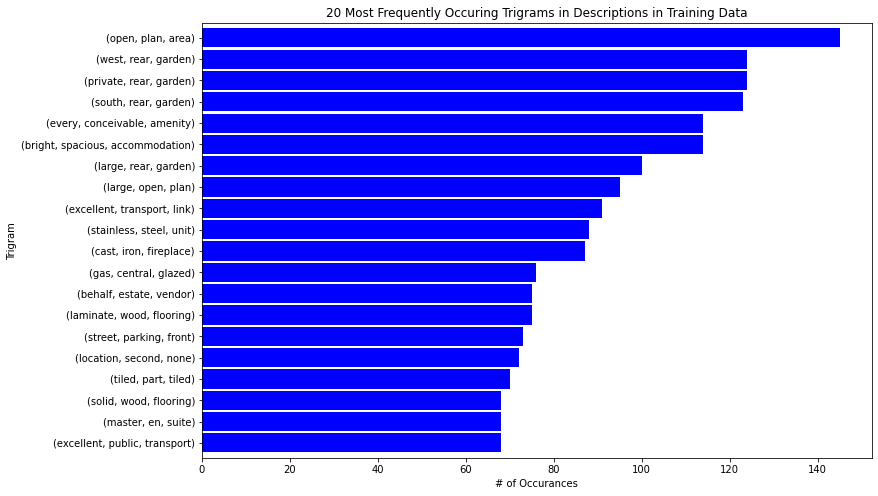

In [71]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams in Descriptions in Training Data')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [72]:
# Do the same for the 'LemmatizedFeatures' training data
lFeat = dftrain['LemmatizedFeatures'].tolist()
lF = []
for l in lFeat:
  lF.extend(l)

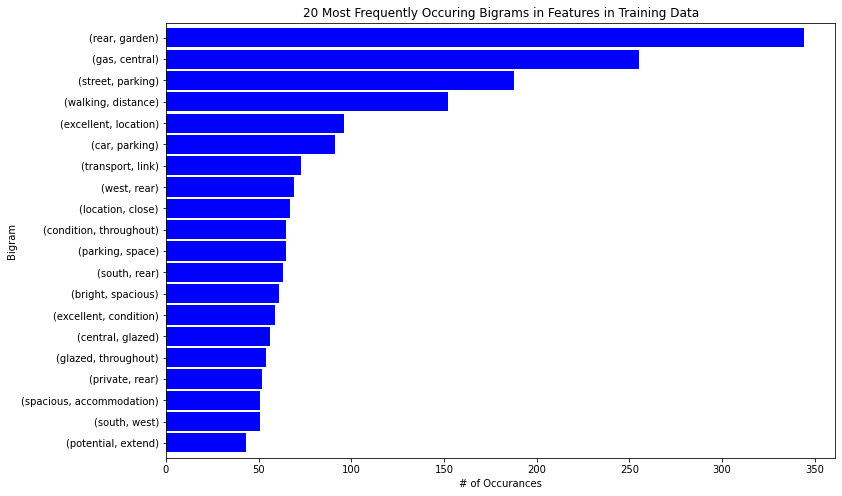

In [73]:
bigrams_series_features = (pd.Series(nltk.ngrams(lF, 2)).value_counts())[:20]
trigrams_series_features = (pd.Series(nltk.ngrams(lF, 3)).value_counts())[:20]
bigrams_series_features.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams in Features in Training Data')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')
plt.show()

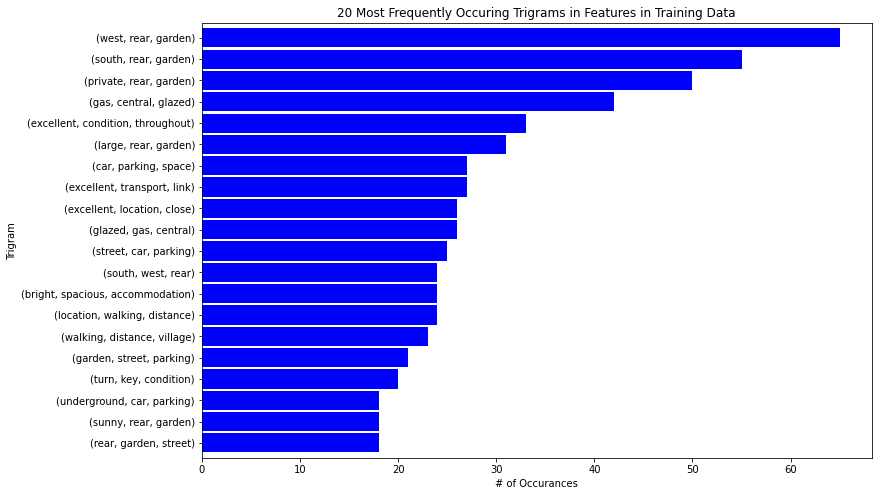

In [74]:
trigrams_series_features.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams in Features in Training Data')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')
plt.show()

# These bi-grams and tri-grams look meaningful

In [75]:
# Columns which contain the lemmatised descriptions and features are all lists: transform lists into strings, and merge the strings into one column
dftrain['LemmatizedDescriptionString'] = dftrain['LemmatizedDescription'].str.join(' ')
dftest['LemmatizedDescriptionString'] = dftest['LemmatizedDescription'].str.join(' ')
dftrain['LemmatizedFeaturesString'] = dftrain['LemmatizedFeatures'].str.join(' ')
dftest['LemmatizedFeaturesString'] = dftest['LemmatizedFeatures'].str.join(' ')

In [76]:
dftrain['DescriptionAndFeatures'] = dftrain['LemmatizedDescriptionString'] + dftrain['LemmatizedFeaturesString']
dftest['DescriptionAndFeatures'] = dftest['LemmatizedDescriptionString'] + dftest['LemmatizedFeaturesString']

In [77]:
dftrain.isna().sum()

Index                          0
Num_Bathrooms                  0
Num_Beds                       0
BER_class                      0
Description                    0
Features                       0
Latitude                       0
Longitude                      0
Surface                        0
Price                          0
Type_apartment                 0
Type_bungalow                  0
Type_detached                  0
Type_duplex                    0
Type_end-of-terrace            0
Type_semi-detached             0
Type_site                      0
Type_studio                    0
Type_terraced                  0
Type_townhouse                 0
TokenisedDescription           0
TokenisedFeatures              0
LemmatizedDescription          0
LemmatizedFeatures             0
LemmatizedDescriptionString    0
LemmatizedFeaturesString       0
DescriptionAndFeatures         0
dtype: int64

Perform TF-IDF vectorisation

In [78]:
# Now do TD-IDF vectorisation on the training and test data
# min_df=0.05 => exclude words which don't exist in 5% of the data
# max_df=0.95 => exclude words which exist in 95% of the data
# ngram_range=(2,3) => focus on bigrams and trigrams
from  sklearn.feature_extraction.text import TfidfVectorizer
oTfIdf = TfidfVectorizer(min_df=0.05, max_df=0.95,ngram_range=(2,3))
npTfIdfTrain = oTfIdf.fit_transform(dftrain['DescriptionAndFeatures'])

In [79]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1637
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Index                        1626 non-null   int64  
 1   Num_Bathrooms                1626 non-null   float64
 2   Num_Beds                     1626 non-null   float64
 3   BER_class                    1626 non-null   float64
 4   Description                  1626 non-null   object 
 5   Features                     1626 non-null   object 
 6   Latitude                     1626 non-null   float64
 7   Longitude                    1626 non-null   float64
 8   Surface                      1626 non-null   float64
 9   Price                        1626 non-null   int64  
 10  Type_apartment               1626 non-null   uint8  
 11  Type_bungalow                1626 non-null   uint8  
 12  Type_detached                1626 non-null   uint8  
 13  Type_duplex       

Convert the output from TF-IDF into a dataframe.  We see that there are 155 new features, which is reasonable

In [80]:
# Create a data frame from this transformed text data
df1 = pd.DataFrame(npTfIdfTrain.toarray(), columns = oTfIdf.get_feature_names())
print(df1)

      accommodation briefly  ...  wooden flooring
0                  0.000000  ...         0.000000
1                  0.000000  ...         0.000000
2                  0.000000  ...         0.134462
3                  0.000000  ...         0.000000
4                  0.000000  ...         0.000000
...                     ...  ...              ...
1621               0.107705  ...         0.452219
1622               0.196749  ...         0.000000
1623               0.000000  ...         0.000000
1624               0.000000  ...         0.000000
1625               0.000000  ...         0.000000

[1626 rows x 155 columns]


In [81]:
# Need to reset the index on 'dftrain' to account for the deleted duplicates earlier.
dftrain = dftrain.reset_index(drop=True)

In [82]:
print(dftrain)

      Index  ...                             DescriptionAndFeatures
0         1  ...  market chipping row two come market excellent ...
1         2  ...  terrace charming red brick period set secluded...
2         3  ...  welcome cotter close immaculately three semide...
3         4  ...  welcome sycamore walk enjoying premier address...
4         5  ...  four come market wonderful opportunity seeking...
...     ...  ...                                                ...
1621   1633  ...  property offer stunning one top come market im...
1622   1634  ...  built road delightful fronted cottage immense ...
1623   1636  ...  leading estate esker park rated plus attic sem...
1624   1637  ...  castle distinctive century four basement caste...
1625   1638  ...  superb opportunity acquire beautiful bijou cot...

[1626 rows x 27 columns]


In [83]:
df1.isna().sum()

accommodation briefly    0
accommodation ground     0
accommodation hallway    0
accommodation porch      0
also close               0
                        ..
well proportioned        0
west rear                0
west rear garden         0
wood flooring            0
wooden flooring          0
Length: 155, dtype: int64

In [84]:
df1.columns

Index(['accommodation briefly', 'accommodation ground',
       'accommodation hallway', 'accommodation porch', 'also close',
       'ample parking', 'ample storage', 'area well', 'back garden',
       'bright spacious',
       ...
       'upstairs three', 'vanity unit', 'walk away', 'walking distance',
       'wall mounted', 'well proportioned', 'west rear', 'west rear garden',
       'wood flooring', 'wooden flooring'],
      dtype='object', length=155)

Perform TF-IDF on the test data

In [85]:
# We apply 'transform' on the text of the 'test' dataframe
npTfIdfTest = oTfIdf.transform(dftest['DescriptionAndFeatures'])
df2 = pd.DataFrame(npTfIdfTest.toarray(), columns=oTfIdf.get_feature_names())
print(df2)

     accommodation briefly  ...  wooden flooring
0                 0.000000  ...              0.0
1                 0.000000  ...              0.0
2                 0.000000  ...              0.0
3                 0.000000  ...              0.0
4                 0.000000  ...              0.0
..                     ...  ...              ...
697               0.146893  ...              0.0
698               0.000000  ...              0.0
699               0.000000  ...              0.0
700               0.000000  ...              0.0
701               0.000000  ...              0.0

[702 rows x 155 columns]


In [86]:
# Now drop the text features: Description, Features, TokenisedDescription, TokenisedFeatures, 'LemmatizedDescription', LemmatizedFeatures,'DescriptionAndFeatures',
dftrain.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString', 'LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)
dftest.drop(columns=['Description','Features','TokenisedDescription','TokenisedFeatures','LemmatizedDescription','LemmatizedFeatures', 'LemmatizedDescriptionString','LemmatizedFeaturesString','DescriptionAndFeatures'], axis=1, inplace=True)

In [87]:
# Add the new features
dftrain = pd.concat([dftrain,df1], axis=1)
dftest  = pd.concat([dftest,df2], axis=1)

In [88]:
dftrain.columns

Index(['Index', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude',
       'Longitude', 'Surface', 'Price', 'Type_apartment', 'Type_bungalow',
       ...
       'upstairs three', 'vanity unit', 'walk away', 'walking distance',
       'wall mounted', 'well proportioned', 'west rear', 'west rear garden',
       'wood flooring', 'wooden flooring'],
      dtype='object', length=173)

In [89]:
dftest.columns

Index(['Index', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude',
       'Longitude', 'Surface', 'Type_apartment', 'Type_bungalow',
       'Type_detached',
       ...
       'upstairs three', 'vanity unit', 'walk away', 'walking distance',
       'wall mounted', 'well proportioned', 'west rear', 'west rear garden',
       'wood flooring', 'wooden flooring'],
      dtype='object', length=171)

In [90]:
dftrain.isna().sum()

Index                0
Num_Bathrooms        0
Num_Beds             0
BER_class            0
Latitude             0
                    ..
well proportioned    0
west rear            0
west rear garden     0
wood flooring        0
wooden flooring      0
Length: 173, dtype: int64

In [91]:
# Move the 'Price' column to the end of the 'dftrain' dataframe

lReorderedColumns = [sColumn for sColumn in dftrain.columns if sColumn != 'Price'] + ['Price']

In [92]:
dftrain = dftrain[lReorderedColumns]

With text columns removed and replaced with the features extracted by TF-IDF, we now have a complete model

In [93]:
dftrain.head()


,Index,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,accommodation briefly,accommodation ground,accommodation hallway,accommodation porch,also close,ample parking,ample storage,area well,back garden,bright spacious,bright spacious accommodation,bring market,built storage,built wardrobe,bus city,bus service,business park,car parking,carpet flooring,cast iron,ceiling coving,central glazed,close proximity,...,short stroll,short walk,side rear,solid wood,sought location,south rear,south rear garden,south west,spacious accommodation,st college,st green,stainless steel,storage space,street parking,subject permission,sunny south,sure appeal,tiled back,tiled flooring,tiled tiled,tiled wall,timber flooring,towel rail,train station,transport link,turn right,turnkey condition,two large,understairs storage,upstairs three,vanity unit,walk away,walking distance,wall mounted,well proportioned,west rear,west rear garden,wood flooring,wooden flooring,Price
0,1,0.693147,0.693147,-0.320278,0.637691,-1.966484,4.204693,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.394089,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.321908,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.165505,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.382596,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.13378,0.0,0.0,0.0,0.0,0.000000,0.0,0.177532,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,195000
1,2,0.000000,0.693147,0.029233,0.093810,0.200678,4.564036,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.380803,0.362685,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.186322,0.190402,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.305067,0.000000,0.000000,0.0,0.0,0.0,0.000000,425000
2,3,1.098612,1.098612,-2.417345,-1.153567,0.385888,4.672829,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.137421,0.0,0.0,0.0,0.0,0.0,0.138597,0.0,0.0,0.0,0.0,0.112251,0.127698,0.000000,0.750912,0.0,0.105216,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.104447,0.133413,0.164262,0.140229,0.0,0.0,0.129195,0.0,0.12598,0.138597,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.132061,0.0,0.123813,0.070180,0.000000,0.000000,0.0,0.0,0.0,0.134462,535000
3,4,0.000000,1.098612,0.728256,-1.220544,0.996066,4.394449,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.471431,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.243205,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.243432,0.000000,0.000000,0.0,0.0,0.0,0.000000,499000
4,5,1.098612,1.386294,0.029233,2.757522,1.489615,5.030438,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.27481,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.264752,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.249328,0.256611,0.0,0.0,0.0,0.000000,510000


In [94]:
dftrain.isna().sum()

Index               0
Num_Bathrooms       0
Num_Beds            0
BER_class           0
Latitude            0
                   ..
west rear           0
west rear garden    0
wood flooring       0
wooden flooring     0
Price               0
Length: 173, dtype: int64

# LINEAR REGRESSION WITH PyMC3

Start by using XGBoost to identify the 10 most important features.  See (Brownlee 2016)

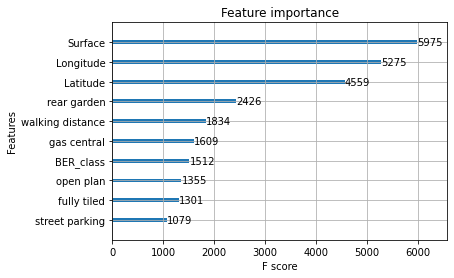

In [95]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

dfTrainCopy = dftrain.copy()
dfTrainIndex = dfTrainCopy['Index']
dfTrainCopy.drop('Index', axis=1,inplace=True)
# For train/test split, 'price' is our label, so drop this when assigning X
X = dfTrainCopy.drop('Price',axis=1)
y = dfTrainCopy['Price']
X_train,X_validate,y_train,y_validate = train_test_split(X, y, test_size=0.3, random_state=43)
oModel = XGBClassifier()
oModel.fit(X_train, y_train)
# plot feature importance
plot_importance(oModel, max_num_features=10)
plt.show()

In [96]:
lFeaturesTrain = ['Surface', 'Longitude', 'Latitude', 'rear garden', 'walking distance', 'gas central', 'BER_class', 'open plan', 'fully tiled', 'street parking']
lFeaturesValidate = lFeaturesTrain.copy()


Use these to train our model.  Note that some features were extracted from NLP processing

In [97]:
df_subset_train = X_train[lFeaturesTrain]

In [98]:
df_subset_train

,Surface,Longitude,Latitude,rear garden,walking distance,gas central,BER_class,open plan,fully tiled,street parking
786,4.094345,0.991688,-0.805610,0.000000,0.000000,0.000000,0.378745,0.145887,0.155312,0.000000
773,4.317488,-0.379967,-0.171884,0.000000,0.341980,0.000000,-1.718322,0.000000,0.000000,0.000000
495,4.222445,-0.343095,0.408293,0.000000,0.000000,0.000000,0.029233,0.000000,0.507267,0.000000
1198,4.204693,0.341339,0.664049,0.000000,0.000000,0.000000,0.029233,0.000000,0.000000,0.000000
1278,4.700480,-0.451610,-1.005469,0.172801,0.000000,0.113736,-1.368811,0.000000,0.122765,0.121427
...,...,...,...,...,...,...,...,...,...,...
16,5.099256,-0.059682,-0.386630,0.000000,0.079483,0.000000,2.126300,0.000000,0.000000,0.000000
58,4.548600,-1.705755,0.572682,0.116269,0.000000,0.000000,0.029233,0.000000,0.000000,0.163404
277,3.616309,-0.464165,-0.580655,0.000000,0.000000,0.000000,1.077767,0.000000,0.000000,0.000000
255,4.787492,-0.292578,0.584693,0.000000,0.084260,0.000000,-0.669789,0.000000,0.000000,0.098609


In [99]:
df_subset_test = X_validate[lFeaturesTrain]

In [100]:
df_subset_test

,Surface,Longitude,Latitude,rear garden,walking distance,gas central,BER_class,open plan,fully tiled,street parking
67,4.804021,1.166891,0.689589,0.000000,0.000000,0.000000,0.029233,0.000000,0.000000,0.000000
317,4.797772,-0.203947,-0.633379,0.000000,0.148945,0.163269,1.776789,0.331070,0.000000,0.174309
131,5.029784,1.240472,-1.190771,0.589180,0.088443,0.000000,-1.368811,0.196588,0.000000,0.103504
1517,4.426044,-1.614859,-0.502616,0.113156,0.271777,0.148956,-0.320278,0.000000,0.000000,0.000000
1158,4.605170,0.442046,-0.890584,0.497121,0.198997,0.109067,1.776789,0.110581,0.000000,0.232885
...,...,...,...,...,...,...,...,...,...,...
1071,4.624973,0.545922,3.661812,0.000000,0.162711,0.000000,0.029233,0.000000,0.000000,0.000000
85,4.189655,0.174467,-0.850463,0.000000,0.074458,0.163236,0.029233,0.082751,0.000000,0.000000
1018,4.605170,-0.381513,-0.983716,0.000000,0.000000,0.000000,0.728256,0.000000,0.000000,0.152512
235,4.890349,0.786582,-0.840186,0.356449,0.107014,0.000000,0.029233,0.118934,0.126617,0.125238


In [101]:
Xs_train = df_subset_train.values
ys_train = y_train.values.reshape(-1,1)

Xs_test  = df_subset_test.values
ys_test  = y_validate.values

In [102]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [103]:
# model
# Train PyMC3 linear model on training data
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 900.29


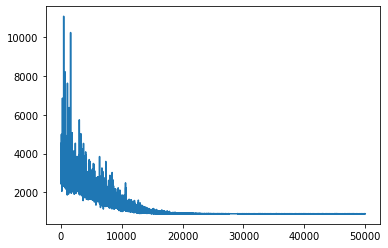

In [104]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [105]:
# samples from the posterior
posterior = approximation.sample(5000)

In [106]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

fFullModelMAE = np.mean(abs(y_pred_BLR - y_validate))
fFullModelMAPE = np.mean(abs(y_pred_BLR - y_validate)/y_validate)
print ("MAE (full model) (using validation dataset)  = {}".format(fFullModelMAE))
print ("MAPE (full model) (using validation dataset) = {}".format(fFullModelMAPE))



MAE (full model) (using validation dataset)  = 161568.2494133947
MAPE (full model) (using validation dataset) = 0.25999014037833945


In [107]:
# Generate predictions for Test data
Xs_test_fullModel = dftest[lFeaturesTrain].values
Xss_test_fullModel = np.hstack([Xs_test_fullModel,Xs_test_fullModel[:,[2]]**2])
Xn_test_fullModel = xscaler.transform(Xss_test_fullModel)

In [108]:
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test_fullModel.T)
y_pred_test_fullModel = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [109]:
dfFullBayesianModelPricePredictions = pd.DataFrame({"Price": y_pred_test_fullModel })
#dfFullBayesianModelKagglePredictions = pd.DataFrame(dftest['Index'] + dfFullBayesianModelPricePredictions['Price'])
dfFullBayesianModelKagglePredictions = pd.concat([dftest['Index'],dfFullBayesianModelPricePredictions],axis=1)
dfFullBayesianModelKagglePredictions.describe()

,Index,Price
count,702.000000,7.020000e+02
mean,1989.500000,5.326238e+05
std,202.794231,6.484091e+05
min,1639.000000,1.149185e+05
25%,1814.250000,3.125875e+05
50%,1989.500000,4.272889e+05
75%,2164.750000,5.896964e+05
max,2340.000000,1.526582e+07


In [110]:
dfFullBayesianModelKagglePredictions.head()

,Index,Price
0,1639,328601.172588
1,1640,538080.399714
2,1641,518856.844152
3,1642,835016.321672
4,1643,455835.563961






# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

(Germano 2020) discusses Piecewise-Linear Regression.  (Mahendru 2019) describes how to determine the optimal value of 'K' for K-Means clustering

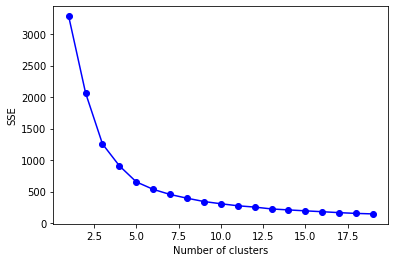

In [111]:
# This import is needed to run K-Means clustering
from sklearn import cluster

# See (Herman-Saffar 2021)
# clustering by features latitude (feature 0) and longitude (feature 1)
ind=[1,2]

# Stack training and test data together, focusing on features 0 and 1 (latitude and longitude)

X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Sum of squared error/distance
dSse = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(n_clusters=k, random_state=42).fit(X_ind)
    #print(data["clusters"])
    dSse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(dSse.keys()), list(dSse.values()), 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# Comment
From visual inspection, the 'elbow' of this dataset appears to be at 4.

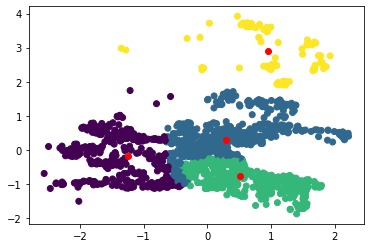

In [112]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
#  n_components = 4 to correspond with the four clusters identified above
gmm = GaussianMixture(n_components=4)

# Gaussian Mixture
gmm.fit(X_ind)
colour = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1],c=colour)
# plot centroids in red
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c='red')

In [113]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))



{0: 285, 1: 453, 2: 337, 3: 63}

In [114]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 110, 1: 194, 2: 153, 3: 31}

In [115]:
# For each of the five clusters, grab the test and training data; scale and log-transform the cost data
# These are the five 
# Cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [116]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [117]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [118]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [119]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 241.59


In [120]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 466.45


In [121]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 264.7


In [122]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 110.43


In [123]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



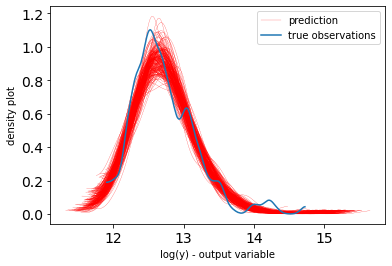

In [124]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

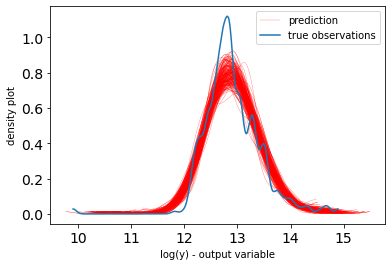

In [125]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

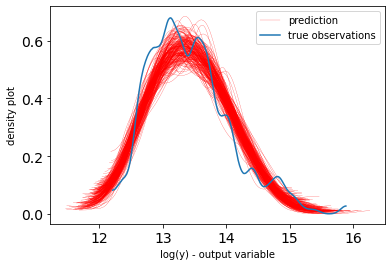

In [126]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

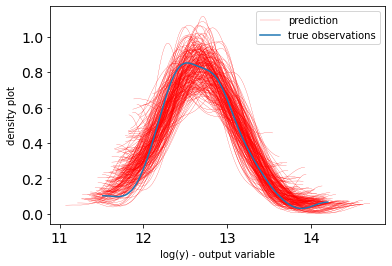

In [127]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

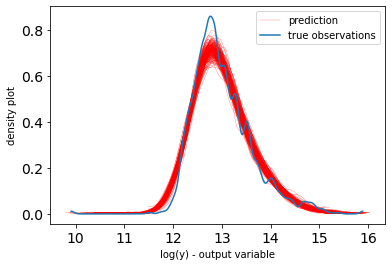

In [128]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)


# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [129]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ",\nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_validate[clusters_test==0]))))
print("MAPE Cluster0 = ",(np.mean(abs(y_pred_BLR0 - y_validate[clusters_test==0]) /y_validate[clusters_test==0])))
print("\n")

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ",\nMAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_validate[clusters_test==1]))))
print("MAPE Cluster1 = ",(np.mean(abs(y_pred_BLR1 - y_validate[clusters_test==1]) /y_validate[clusters_test==1])))
print("\n")

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ",\nMAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_validate[clusters_test==2]))))
print("MAPE Cluster2 = ",(np.mean(abs(y_pred_BLR2 - y_validate[clusters_test==2]) /y_validate[clusters_test==2])))
print("\n")



# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ",\nMAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_validate[clusters_test==3]))))
print("MAPE Cluster3 = ",(np.mean(abs(y_pred_BLR3 - y_validate[clusters_test==3]) /y_validate[clusters_test==3])))
print("\n")



Size Cluster0 110 ,
MAE Cluster0= 207599.48837360382
MAPE Cluster0 =  0.5161680850145581


Size Cluster1 194 ,
MAE Cluster1= 86078.2459898517
MAPE Cluster1 =  0.18042014810068646


Size Cluster2 153 ,
MAE Cluster2= 209284.28065305558
MAPE Cluster2 =  0.17828011818000356


Size Cluster3 31 ,
MAE Cluster3= 69093.13117059451
MAPE Cluster3 =  0.1432627872915709




In [130]:
# joint
npJointMAE=np.hstack([abs(y_pred_BLR0 - y_validate[clusters_test==0]),
                 abs(y_pred_BLR1 - y_validate[clusters_test==1]),
                 abs(y_pred_BLR2 - y_validate[clusters_test==2]),
                 abs(y_pred_BLR3 - y_validate[clusters_test==3])])

# Joint MAPE
npJointMAPE=np.hstack([abs(y_pred_BLR0 - y_validate[clusters_test==0]) / y_validate[clusters_test==0],
                 abs(y_pred_BLR1 - y_validate[clusters_test==1]) / y_validate[clusters_test==1],
                 abs(y_pred_BLR2 - y_validate[clusters_test==2]) / y_validate[clusters_test==2],
                 abs(y_pred_BLR3 - y_validate[clusters_test==3]) / y_validate[clusters_test==3]])


# MAE
print("Piecewise Regression MAE (trained with validation data) = {}".format(np.mean(npJointMAE)))
print("Piecewise Regression MAPE (trained with validation data)= {}".format(np.mean(npJointMAPE)))

print("Full Model MAE (trained with validation data)  = {}".format(fFullModelMAE))
print("Full Model MAPE (trained with validation data) = {}".format(fFullModelMAPE))

Piecewise Regression MAE (trained with validation data) = 151019.47837978194
Piecewise Regression MAPE (trained with validation data)= 0.2530696773990037
Full Model MAE (trained with validation data)  = 161568.2494133947
Full Model MAPE (trained with validation data) = 0.25999014037833945


In [131]:
# Grab 'Index' column from Test dataframe
npTestIndex = dftest[['Index']].to_numpy()

In [132]:
# Add the Index to the 'full model' from earlier
Xn_test_piecewise = np.hstack((npTestIndex, Xn_test_fullModel))

# Cluster the data
clusters_piecewise_test = gmm.predict(Xn_test_piecewise[:,ind])

# Form four clusters of test data
Xtestn0_piecewise = Xn_test_piecewise[clusters_piecewise_test==0,:]
Xtestn1_piecewise = Xn_test_piecewise[clusters_piecewise_test==1,:]
Xtestn2_piecewise = Xn_test_piecewise[clusters_piecewise_test==2,:]
Xtestn3_piecewise = Xn_test_piecewise[clusters_piecewise_test==3,:]

#Store the indexes for cluster
iCluster0Index = Xtestn0_piecewise[:,0]
iCluster1Index = Xtestn1_piecewise[:,0]
iCluster2Index = Xtestn2_piecewise[:,0]
iCluster3Index = Xtestn3_piecewise[:,0]

# Prediction doesn't use the index, so ignore column 0
Xtestn0_final = Xtestn0_piecewise[:,1:]
Xtestn1_final = Xtestn1_piecewise[:,1:]
Xtestn2_final = Xtestn2_piecewise[:,1:]
Xtestn3_final = Xtestn3_piecewise[:,1:]

# Predictions
y_pred_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))
y_pred_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))
y_pred_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))
y_pred_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))

In [133]:
# Now add the indices back to the predictions
piecewisePrediction_0 = np.hstack((iCluster0Index[:, None], y_pred_test0[:, None]))
piecewisePrediction_1 = np.hstack((iCluster1Index[:, None], y_pred_test1[:, None]))
piecewisePrediction_2 = np.hstack((iCluster2Index[:, None], y_pred_test2[:, None]))
piecewisePrediction_3 = np.hstack((iCluster3Index[:, None], y_pred_test3[:, None]))

# Combine vertically
piecewisePrediction = np.vstack((piecewisePrediction_0, piecewisePrediction_1, piecewisePrediction_2, piecewisePrediction_3))

# Sort on the index 
piecewisePrediction = piecewisePrediction[piecewisePrediction[:, 0].argsort()]


In [134]:
dfPiecewiseModelPricePredictions = pd.DataFrame({"Price": piecewisePrediction[:,1] })
dfPiecewiseModelKagglePredictions = pd.concat([dftest['Index'],dfPiecewiseModelPricePredictions],axis=1)
dfPiecewiseModelKagglePredictions.describe()
dfPiecewiseModelKagglePredictions.head()

,Index,Price
0,1639,3.221029e+05
1,1640,1.302310e+06
2,1641,1.056691e+06
3,1642,7.491005e+05
4,1643,5.889113e+05


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

In [135]:
kernel = GPy.kern.RBF(input_dim=1,lengthscale=0.15,variance=0.2)
print(kernel)


  rbf.         |  value  |  constraints  |  priors
  variance     |    0.2  |      +ve      |        
  lengthscale  |   0.15  |      +ve      |        


In [136]:
import theano

In [137]:
# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])


Create a Bayesian NN with one hidden layer

In [138]:
floatX = theano.config.floatX

l = 20
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

Note: Learning rate (LR) set to 0.01: experience was that a smaller learning rate did not yield better results

In [139]:
# we can do instead an approximated inference
param3 = 50000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 867.22


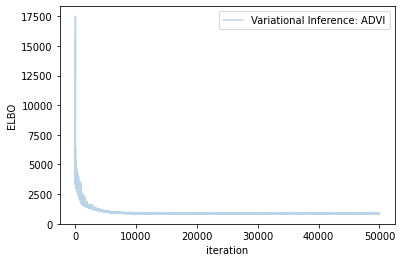

In [140]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [141]:
# draw samples from variational posterior
D = 1000
posterior = approx.sample(draws=D)

In [142]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)
y_pred_BLR = np.exp(yscaler.inverse_transform(y_pred.reshape(-1,1)))[:,0]

In [143]:
# prediction
fBNN_MAE =  np.mean(abs(y_pred_BLR - y_validate))
fBNN_MAPE = np.mean(abs(y_pred_BLR - y_validate)/y_validate)
print("Bayesian NN MAE (trained with validation data) = {}".format(fBNN_MAE))
print("Bayesian NN MAPE (trained with validation data) = {}".format(fBNN_MAPE))


from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_pred_BLR, y_pred))
print("RMSE = {}". format(rms))

from sklearn.metrics import mean_squared_log_error
fRMSLE = np.sqrt(mean_squared_log_error( y_validate, y_pred_BLR ))
print("RMSLE = {}".format(fRMSLE))

Bayesian NN MAE (trained with validation data) = 118145.32786315132
Bayesian NN MAPE (trained with validation data) = 0.1705368098665217
RMSE =  607509.2919839941
RMSLE = 0.23318997942236516


In [144]:
# Generate predictions for test data

In [145]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test_fullModel.shape[0],1)), Xn_test_fullModel])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)
y_pred_BLR = np.exp(yscaler.inverse_transform(y_pred.reshape(-1,1)))[:,0]

In [146]:
dfBNNPricePredictions = pd.DataFrame(y_pred_BLR, columns=['Price'])

In [147]:
dfKaggleBNNPredictions = pd.concat([dftest['Index'],dfBNNPricePredictions],axis=1)

In [148]:
dfKaggleBNNPredictions.head()

,Index,Price
0,1639,4.143971e+05
1,1640,4.427227e+05
2,1641,4.282782e+05
3,1642,1.343374e+06
4,1643,3.815540e+05


In [149]:
dfKaggleBNNPredictions.tail()

,Index,Price
697,2336,211298.220774
698,2337,248562.692790
699,2338,454893.842127
700,2339,861580.953861
701,2340,649669.314378


In [150]:

dfKaggleBNNPredictions.to_csv('submission.csv',index=False)

# SUMMARY





The goal of this exercise was to build and evaluate regression models for use in the prediction of house prices, with the added objective of using NLP to extract features from text in the dataset.

As ever, the first steps were to analyse and clean the dataset, removing features which were not useful (e.g. by having too many missing values), removing duplicates, dealing with missing values, etc.

Using NLP was a new experience, requiring a number of steps to complete:
- Text Preprocessing, which required:
   - expansion of contracted words
   - removal of non-words (abbreviations etc)
   - removal of punctuation
   - removal of words which add no value or meaning to the text
   - removal of numbers
- Tokenisation
- Lemmatisation (converting recognised verb forms into a single standard stem)

Following lemmatisation, the top 20 bi-grams and tri-grams were identified, and TF-IDF vectorisation was applied to develop new numeric features.  This resulted in the creation of 155 new features, which then replaced the original text in the data.

XGBoost was then used to identify the features which had most influence on the price, and it was notable that among the top ten features were ones which had been extracted from text with NLP.

A Bayesian Linear Model was then trained which returned a Mean Absolute Percentage Error (MAPE) score of 0.2599.  

The data was then clustered based on latitude and longitude.  K-means clustering identified that the data formed four clusters.  Piecewise-linear regression was then run on these four clusters.  The Mean Absolute Percentage Error (MAPE) score of this model was 0.253.

Finally, a Bayesian Neural Network with one hidden layer was trained.  Its MAPE score was 0.17, better than the other two models.

Had time permitted, it would have been interesting to see how a model trained using text-derived features alone would have performed, and it would have been interesting to see how a model trained using non-text features would have performed.  Not shown above is a run I did in which I included all of the text-derived features in the piecewise regression.  These did not converge: there was not enough data in the individual clusters to allow that to happen.

This was a time-consuming and challenging assignment, with many new concepts (NLP and Bayesian NN) introduced for the first time.  Both of these topics need more exploration than was possible in the limited time available

# References


Brownlee, J. (2016) ‘Feature Importance and Feature Selection With XGBoost in Python’, Machine Learning Mastery, available: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/ [accessed 3 Oct 2021].

data4help (2021a) NLP with Real Estate Advertisements — Part 1 [online], Medium, available: https://becominghuman.ai/nlp-with-real-estate-advertisements-part-1-55200e0cb33c [accessed 19 Oct 2021].

data4help (2021b) NLP with Real Estate Advertisements — Part 2 [online], Medium, available: https://becominghuman.ai/nlp-with-real-estate-advertisements-part-2-f944e566644b [accessed 19 Oct 2021].

Dios, E.C.D. (2020) From DataFrame to N-Grams [online], Medium, available: https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460 [accessed 19 Oct 2021].

Germano, M.F. (2020) Piecewise Linear Regression Model. What Is It and When Can We Use It? [online], Medium, available: https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452 [accessed 3 Oct 2021].

Herman-Saffar, O. (2021) An Approach for Choosing Number of Clusters for K-Means [online], Medium, available: https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c [accessed 3 Oct 2021].

Mahendru, K. (2019) ‘How to determine the optimal K for K-Means?’, Analytics Vidhya, available: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb [accessed 3 Oct 2021].

Maklin, C. (2019) TF IDF | TFIDF Python Example [online], Medium, available: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76 [accessed 19 Oct 2021].
